# Milka Vladislav

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
cols = ['Country', 'Energy Supply', 'Energy Supply per Capita', '%Renewable']
usecols = [2, 3, 4, 5]
skiprows = [i for i in range(0, 18)]
for i in range(245, 300):
    skiprows.append(i)

df1 = pd.read_excel(r'En_In.xlsx', header=None, names=cols, usecols=usecols, skiprows=skiprows)

In [70]:
df1.loc[df1['Energy Supply'] == '...', 'Energy Supply'] = np.nan
df1.loc[df1['Energy Supply per Capita'] == '...', 'Energy Supply per Capita'] = np.nan

df1 = df1.astype({'Energy Supply':'float'})
df1 = df1.astype({'Energy Supply':'float'})

df1.update(df1[['Energy Supply']].mask(df1['Energy Supply'] != '...', lambda x: x * 1000000))

In [71]:
df1['Country'] = df1['Country'].str.replace(r'[0-9]+|\(.*\)', '', regex=True)

In [72]:
df1['Country'] = df1['Country'].replace("Republic of Korea", "South Korea")
df1['Country'] = df1['Country'].replace("United States of America", "United States")
df1['Country'] = df1['Country'].replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")
df1['Country'] = df1['Country'].replace("China, Hong Kong Special Administrative Region", "Hong Kong")

In [73]:
df2 = pd.read_csv('gpd.csv', skiprows = 4)
df2['Country Name'] = df2['Country Name'].replace('Korea, Rep.', 'South Korea')
df2['Country Name'] = df2['Country Name'].replace('Iran, Islamic Rep.', 'Iran')
df2['Country Name'] = df2['Country Name'].replace('Hong Kong SAR, China', 'Hong Kong')

In [74]:
df3 = pd.read_excel(r'scimagojr.xlsx')
df1m = df1
df2m = df2[['Country Name', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
df3m = df3.loc[df3['Rank'] < 16]
df4m = pd.merge(df3m, df1m, on='Country', how='outer')
df4m = df4m.loc[df4m['Rank'] < 16]

df = pd.merge(df4m, df2m, how='outer', left_on='Country', right_on='Country Name')
df = df.loc[df['Rank'] < 16]

df = df[['Country', 'Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
        'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
        '%Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
df = df.set_index('Country')

In [75]:
def get_avg_gdp_for_each_country(dfp):
    dfp = dfp[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    dfp['avg gdp'] = dfp[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
    dfp = dfp.sort_values('avg gdp', ascending=False)
    return dfp[['avg gdp']]

get_avg_gdp_for_each_country(df.copy())

,avg gdp
Country,
United States,1.536434e+13
China,6.348609e+12
Japan,5.542208e+12
Germany,3.493025e+12
France,2.681725e+12
United Kingdom,2.487907e+12
Brazil,2.189794e+12
Italy,2.120175e+12
India,1.769297e+12


In [76]:
def get_gdp_changes_for_coutry_with_5th_avg_gdp(dfp):
    dfx = get_avg_gdp_for_each_country(dfp.copy())
    index = dfx.iloc[[4]].index.values[0]
    
    dfp_diff = dfp[['2006', '2015']]
    dfp_diff = dfp_diff.loc[[index]]
    
    return (index, dfp_diff['2015'][0] - dfp_diff['2006'][0])

get_gdp_changes_for_coutry_with_5th_avg_gdp(df.copy())

('France', 153345695364.24023)

In [77]:
def get_country_with_max_renewable_percent(dfp):
    dfp = dfp.loc[dfp['%Renewable'].idxmax()]
    index = dfp.name
    percent = dfp.loc[['%Renewable']]['%Renewable']
    return (index, percent)

get_country_with_max_renewable_percent(df.copy())

('Brazil', 69.64803)

In [78]:
def count_population_by_energy_consumption(dfp):
    dfp['Population'] = dfp['Energy Supply'] / dfp['Energy Supply per Capita']
    dfp = dfp.sort_values('Population', ascending=False)
    
    index = dfp.iloc[[5]].index.values[0]
    population = dfp.loc[[index]]['Population'][0]
    return (index, population)

count_population_by_energy_consumption(df.copy())

('Japan', 127409395.97315437)

In [79]:
def get_citations_and_energy_consumption_corr(dfp):
    dfp['Population'] = dfp['Energy Supply'] / dfp['Energy Supply per Capita']
    dfp['Citations per Capita'] = dfp['Self-citations'] / dfp['Population']

    dfp = dfp.astype({'Energy Supply per Capita':'float'})
    dfp = dfp.astype({'Citations per Capita':'float'})
    
    return dfp['Energy Supply per Capita'].corr(dfp['Citations per Capita'])

get_citations_and_energy_consumption_corr(df.copy())

0.7339800145698601

In [80]:
def check_if_renewable_higher_than_avg(dfp):
    dfp['Renewable higher than avg'] = np.where(dfp['%Renewable'] >= dfp['%Renewable'].median(), 1, 0)
    return dfp[['Renewable higher than avg']]

check_if_renewable_higher_than_avg(df.copy())

,Renewable higher than avg
Country,
China,1
United States,0
Japan,0
United Kingdom,0
Russian Federation,1
Canada,1
Germany,1
India,0
France,0


In [81]:
def add_continent_info(dfp):
    ContinentDict = {'China':'Asia', 'United States':'North America', 'Japan':'Asia', 'United Kingdom':'Europe', 
                     'Russian Federation':'Europe', 'Canada':'North America', 'Germany':'Europe', 'India':'Asia',
                     'France':'Europe', 'South Korea':'Asia', 'Italy':'Europe', 'Spain':'Europe', 'Iran':'Asia',
                     'Australia':'Australia', 'Brazil':'South America'}
    dfp['Continent'] = pd.Series(ContinentDict)
    return dfp


In [82]:

def get_continent_stats(dfp):
    dfp = add_continent_info(dfp)
    dfp['Population'] = dfp['Energy Supply'] / dfp['Energy Supply per Capita']
    dfp2 = dfp.groupby('Continent')['Population'].agg(['size', 'sum', 'mean', 'std'])
    return dfp2[['size', 'sum', 'mean', 'std']]

get_continent_stats(df.copy())

,size,sum,mean,std
Continent,,,,
Asia,5,2821590756.3585,7.053977e+08,7.138779e+08
Australia,1,23316017.316017,2.331602e+07,NaN
Europe,6,457929667.216372,7.632161e+07,3.464767e+07
North America,2,352855249.48025,1.764276e+08,1.996696e+08
South America,1,205915254.237288,2.059153e+08,NaN


<Figure size 640x800 with 0 Axes>

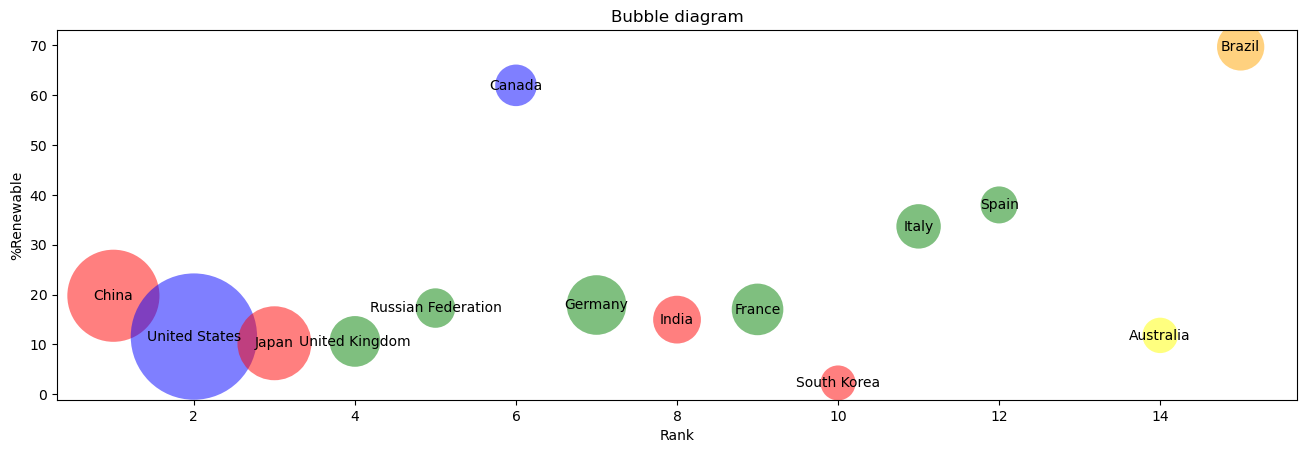

In [83]:
def make_renewable_vs_rank_diagram(dfp):
    ContinentColorDict = {'Asia':'red', 'North America':'blue', 'Europe':'green', 'Australia':'yellow', 
                          'South America':'orange'}
    dfp = add_continent_info(dfp)
    
    %matplotlib inline
    plt.rcParams['figure.dpi'] = 100 
    plt.figure().set_figheight(8) 
    plt.figure().set_figwidth(16) 
    
    plt.scatter(x=dfp['Rank'], y=dfp['%Renewable'], s=dfp['2015'] / 2000000000, 
                c=pd.Series(ContinentColorDict)[dfp['Continent']], edgecolors='none', alpha=0.5)
    
    for i, txt in enumerate(dfp.index):
        plt.annotate(txt, xy=(dfp['Rank'].iat[i], dfp['%Renewable'].iat[i]), ha="center", va="center")
    
    plt.title('Bubble diagram')
    plt.ylabel('%Renewable')
    plt.xlabel('Rank')
    plt.show()

    
make_renewable_vs_rank_diagram(df.copy())